In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('C:/Users/Administrator/Class Notebooks/data/SUV-data.csv')

In [6]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
data.sample(10)

,Age,EstimatedSalary,Purchased
114,42,80000,0
308,36,125000,1
143,30,89000,0
384,57,33000,1
99,28,37000,0
182,32,117000,1
333,40,65000,0
337,35,79000,0
349,38,61000,0
242,50,88000,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [9]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
pd.pivot_table(data, index='Purchased', values = ('Age','EstimatedSalary'))

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [11]:
X = data.drop('Purchased', axis = 1)
y = data['Purchased']

In [12]:
X.shape, y.shape

((400, 2), (400,))

In [13]:
# Splitting the data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,train_size = 0.75, random_state = 101)

In [14]:
# Looking theX _train & X_test

In [15]:
X_train.head()

,Age,EstimatedSalary
39,27,31000
95,35,44000
109,38,80000
9,35,65000
224,35,60000


In [16]:
X_test.head()

,Age,EstimatedSalary
38,26,72000
387,39,71000
270,43,133000
181,31,71000
195,34,43000


In [18]:
# Looking at the shape 
X_train.shape, X_test.shape

((300, 2), (100, 2))

In [19]:
# Scaling our train & test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train[0:5,:]

array([[-1.03893527, -1.12434375],
       [-0.25900263, -0.73854922],
       [ 0.03347211,  0.32980486],
       [-0.25900263, -0.11534267],
       [-0.25900263, -0.26372518]])

In [21]:
X_test[0:5,:]

array([[-1.13642685,  0.09239284],
       [ 0.13096369,  0.06271634],
       [ 0.52093001,  1.90265948],
       [-0.64896895,  0.06271634],
       [-0.35649421, -0.76822572]])

In [23]:
# Model Building 
from sklearn.neighbors import KNeighborsClassifier
# Building Model
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p= 2)
# Training our model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
# Predicting the result
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
cm = confusion_matrix(Y_test, y_pred)

In [28]:
cm

array([[54, 11],
       [ 4, 31]], dtype=int64)

In [30]:
accuracy_score(Y_test, y_pred)

0.85

In [31]:
# We will use a for loop to have different values of K & will look at the accuracy


In [36]:
error_rate = []
for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p= 2)
        knn.fit(X_train, Y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i !=Y_test))
        

In [37]:
error_rate

[0.15,
 0.11,
 0.09,
 0.09,
 0.08,
 0.07,
 0.09,
 0.08,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.08,
 0.1,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.1,
 0.1,
 0.09,
 0.08,
 0.08,
 0.07,
 0.08,
 0.09,
 0.08,
 0.08,
 0.07,
 0.08,
 0.08,
 0.08,
 0.08,
 0.07,
 0.07,
 0.09]

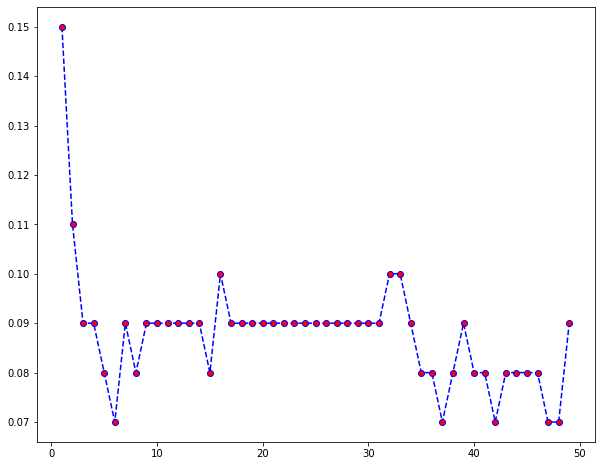

In [38]:
plt.figure(figsize = (10,8))
plt.plot(range(1,50), error_rate, color = 'blue', ls = '--', marker = 'o',markerfacecolor = 'red')

In [39]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p= 2)
knn.fit(X_train, Y_train)
pred_i = knn.predict(X_test)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

In [40]:
cm

array([[57,  8],
       [ 1, 34]], dtype=int64)

In [41]:
accuracy_score(Y_test, y_pred)

0.91

In [42]:
knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p= 2)
knn.fit(X_train, Y_train)
pred_i = knn.predict(X_test)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

In [43]:
accuracy_score(Y_test, y_pred)

0.93

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p= 2)
knn.fit(X_train, Y_train)
pred_i = knn.predict(X_test)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

In [45]:
accuracy_score(Y_test, y_pred)

0.92

In [46]:
knn = KNeighborsClassifier(n_neighbors=4, metric='minkowski', p= 2)
knn.fit(X_train, Y_train)
pred_i = knn.predict(X_test)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

In [47]:
accuracy_score(Y_test, y_pred)

0.91